<i> Copyright &copy; 2025 Johns Hopkins University.  Not for distribution online or by any other means.</i>

Evan Edelstein, Programming Assignment 4, Algorithms 605.621

***Statement of Academic Integrity:*** The work in this exercise is mine alone without un-cited help. No AI was used to answer these questions. 

# Overview

In this assignment, we will continue to explore the Maryland Lighthouse Challenge problem.  In PA 2, you implemented a brute-force solution to the problem.  This is guaranteed to get the optimal solution, but it was extremely slow to run.  In PA 3, you implemented a technique called memoization, which traded memory for computation to speed up the results.  However, on very large data sets, this is still impractical, since the memory required for storing the intermediate results may also be excessively large.

In this assignment, we're going to give up on the requirement of finding the best possible path, and instead see if we can get an approximate solution that will be "good enough".  We will want to try to come to an understanding of both how much computation we will save, and how much error we will incur as a result.

The approximation technique we will use is a simple, greedy algorithm:  the algorithm will start at a (randomly-chosen) start light, and then move to the nearest neighbor left in the list.  This will continue until all lighthouses have been visited.  The exact path chosen, and thus the error introduced by the greedy algorithm, will vary depending on the start light and on the specific geometry of the lighthouse layout.  So, a point estimate of the performance will likely be misleading.  To handle this issue, you will be implementing a *Monte Carlo experiment*-- you will run the data collection multiple times, to collect an ensemble of error values, and then draw conclusions from a statistical analysis of the error data.

For this problem, you should use the following assumptions:
1. The contest requires a visit of all lighthouses; the winner is the first team to visit all lights (the contestants do not need to return to the start point).
1. Teams may start at any lighthouse, and finish at any other lighthouse. 
1. Travel time from A to B is the same as the time from B to A. (Equivalently, the paths A->B->C and C->B->A are equal, and your algorithm is correct if it provides either one.  You do not need to provide both.)
1. Several utility functions are provided for your use-- you may modify these as you see fit, or write your own.  Your fastest_tour_bf() program from PA 2 will be a utility function for you to use in this assignment, to calculate the error introduced by our approximation algorithm, and to compare the reduction in workload we achieve.


# Restrictions

1. You should only use Python inbuilt data structures for this assignment (e.g. lists, dictionaries, tuples, etc.)  *Hint:* Pay close attention to the rules on whether a Python data type is *mutable* (changeable) or *immutable* (not)-- remember that only *immutable* data items (like tuples) should be used as keys to dictionaries.
1. You may not use Python libraries for combinatorics, sorting, permutations, combinations, or similar tools.  You need to build all logical structures that traverse the data set yourself, so that you can accurately measure the workload imposed by your algorithmic choices.
1. Do not use Python's sort() function (or any other library function for sorting or ordering lists).  You will underestimate the workload imposed by your algorithm if you use the Python libraries.  An implementation of mergesort() is given to you in the utility programs block.  If you need to sort data, use this function and add an appropriate step-count variable to the code to account for the induced workload.
1. When in doubt, **ASK FIRST**
1. This is not a collaborative problem-- all the work in this notebook should be your individual effort
1. Don't change the signatures of the functions or the kickoff code, as this is used by the grader for automated correctness checking.  You will get points off if you modify the input and output blocks (noted with "DO NOT MODIFY THIS BLOCK") or if your code doesn't execute without modification.  
1. If you didn't get your code working correctly in PA 2, contact the instructor for assistance.


# PART 1:  IMPLEMENTATION

## 1a. Pseudocode (10 pts)

Given a start light and a list of lighthouses, use the nearest neighbor approximation to find the approximate best path using a greedy approach. 
	
<!--- This is a Markdown comment. -->
<!--- Separate the $...$ in many cases to get Latex to render properly.
      In output LaTeX, use incorrectly closed <span hidden> to pass in LaTeX options. -->
// ***I WILL MAKE THIS PSEUDOCODE INTO MY ALGORITHM.***

Function fastest_tour_nn returns an orderedList of lighthouses, the tour time, and the number of 'steps' taken by code. It assumes 3 external functions: list_minus, get_travel_time and mergeSort.

1. **function** fastest_tour_nn(start_light, L): <span hidden>\setlength\itemsep{0.0em}</div>
1. $~~~~$ tour $\gets$ [start_light] *# Hold tour of lighthouses*<br>
1. $~~~~$ tour_time $\gets$ 0 *# Hold tour time*<br>
1. $~~~~$ all_steps $\gets$ 0 *# Hold total number of steps*<br>
1. $~~~~$ L $\gets$ **list_minus**(L, start_light) *#Remove start_light from L*<br>
1. $~~~~$ current_light $\gets$ start_light
1. $~~~~$ 
1. $~~~~$ While len(L): *# While lighthouses left* 
1. $~~~~~~~$ next_time $\gets$ inf
1. $~~~~~~~$ next_light $\gets$ NULL
1. $~~~~~~~$ for second_light in L:
1. $~~~~~~~~~~$ time $\gets$ **get_travel_time**(current_light, second_light) *# Get travel time between current_light and second_light*
1. $~~~~~~~~~~$ if time < next_time:
1. $~~~~~~~~~~~~~$ next_time $\gets$ time
1. $~~~~~~~~~~~~~$ next_light $\gets$ second_light
1. $~~~~~~~~~~$ all_steps += 1
1. $~~~~~~~$ 
1. $~~~~~~~$ assert next_light is not NULL
1. $~~~~~~~$ 
1. $~~~~~~~$ tour_time += next_time *# Update tour time*
1. $~~~~~~~$ tour.append(next_light) *# Update tour list*
1. $~~~~~~~$ 
1. $~~~~~~~$ *# Setup next iteration of while loop by removing the visited lighthouse (next_light) from L and setting current_light to next_light*
1. $~~~~~~~$ L $\gets$ list_minus(L, next_light) 
1. $~~~~~~~$ current_light $\gets$ next_light
1. $~~~~$ **return** tour, tour_time, all_steps 



## 1b. English-language explanation (10 pts)

The function fastest_tour_nn(start_light, L) defines an algorithm to find a tour through an array of lighthouses L starting from a lighthouse start_light using a nearest neighbor approximation. An external function, *get_travel_time(x,y)* is used to lookup the travel time between two lighthouses. *fastest_tour_nn()* begins by initializing an array *tour* to hold the order of lighthouses visited by the algorithm. *tour* is initialized with the first lighthouse *start_light* as the first element in the array. A variable *tour_time* is used to keep track of the total travel time between the lighthouses in the tour and is initialized to zero. The variable *all_steps*, which is initialized to zero, counts the number of “computational steps” made by the program, as a way of estimating the Big-O runtime of the algorithm. Next, the starting lighthouse is removed from L using an externally defined function *list_minus()*. We now enter the core of the algorithm which aims to tour the lighthouses by choosing the closest lighthouse from the current lighthouse. We start by initializing the *current_light* variable to the starting lighthouse. We then enter a while loop and iterate until all lighthouses in *L* have been toured. Inside the while loop we find the nearest neighbor, update the tour, remove the visited lighthouse from *L* and then update the current lighthouse variable. We start by initializing *next_time* to infinity, this variable will allow us to find the neighboring lighthouse with the shortest travel time, we also initialize a temporary variable *next_light* to store the current closest lighthouse. To find the nearest lighthouse we iterate through the lighthouses in *L*, calculate the travel time from *second_light* to the current lighthouse, and if it is smaller than *next_time*, assign it to *next_time* and assign *next_light* to *second_light*. We then increment *all_steps* to account for the loop iteration. We then check if *next_light* is NULL and throw an error if it is. After the for-loop and error check we are sure that *next_light* holds the closest neighbor and *next_time* holds the travel time from *current_light* to *next_light*. We then update the total tour time by *next_time* and append *next_light* to the tour list. Next, to ensure the while loop continues, *next_light* is removed from *L* and *current_light* is set to *next_light*. After all the lighthouses have been visited the while loop exits and the algorithm returns the order of lighthouses toured, the travel time of the tour, and the total computational steps taken by the algorithm. 

## 1c. Code implementation (25 pts)

Implement your pseudocode from above, using the following signature and code snippets.  Your code must have a reasonable, consistent, style and documentation. It must have appropriate data structures, modularity, and error checking.  Be sure to preserve the instructor input block, and do not change names of any of the variables - they will be inputted fresh by the instructor when testing your code.  Print the best tour and time, using the TRAVEL_TIME and L provided in the instructor input block, so that the correctness of your implementation can be validated.

In [1]:
####################################################
# INSTRUCTOR INPUT BLOCK
# THIS BLOCK WILL BE REPLACED BY INSTRUCTOR INPUTS
# DO NOT CHANGE THE NAMES OF THESE VARIABLES/METHODS
####################################################

TRAVEL_TIME = { 
      ('B', 'A') : 8.043412251828856 ,
      ('B', 'C') : 6.961562065036552 ,
      ('B', 'E') : 11.182761725279896 ,
      ('B', 'D') : 4.829491781522557 ,
      ('A', 'C') : 11.933637650024707 ,
      ('A', 'E') : 17.726993564286605 ,
      ('A', 'D') : 9.160385528861413 ,
      ('C', 'E') : 13.366783356602122 ,
      ('C', 'D') : 5.995980076893033 ,
      ('E', 'D') : 10.864682204416317 ,
}
# Additional test data is given at the bottom of the notebook.  You should also create your own test data as needed

# This function will populate a list L containing the names of the lighthouses
L = list(set([item for k in TRAVEL_TIME.keys() for item in k]))


In [ ]:
# Utility functions that you can use if you wish

def list_minus(L, x):
    # Returns a list of L that does not have x in it
    return list(set(L)-set([x,]))

# def travel_time(x, y):
#     # Looks up x and y in TRAVEL_TIME in a way that order does not matter, returns a time
#     global TRAVEL_TIME
#     try:
#         tm = TRAVEL_TIME[(x,y)] 
#     except:
#         tm = TRAVEL_TIME[(y,x)]
#     return tm

# def random_lighthouses(n):
#     # Generates a random list of n lighthouses
#     # returns a dictionary in the same format as TRAVEL_TIME and a list of lighthouses (new_L)
    
#     from string import ascii_uppercase
#     from random import uniform
#     from itertools import combinations # students aren't allowed to use itertools for this assignment
#     from math import sqrt
    
#     new_TRAVEL_TIME = {}
#     new_L = []
#     letters = list(ascii_uppercase)
    
#     for i in range(1,n):
#         x = uniform(1, 10)
#         y = uniform(1, 10)
#         pt_name = letters[i-1]
#         pt = (pt_name, (x,y))
#         new_L.append(pt)
    
#     pairs = list(combinations(new_L,2))
#     for i in pairs:
#         pt1 = i[0][1]
#         pt2 = i[1][1]
#         dist = sqrt((pt1[0]+pt2[0]**2 + (pt1[1]+pt2[1])**2))
#         name = (i[0][0],i[1][0])
#         new_TRAVEL_TIME[name] = dist
#     return new_TRAVEL_TIME, new_L

# taken from PA3
def random_lighthouses(n):
    # Generates a random list of n lighthouses
    # returns a dictionary in the same format as TRAVEL_TIME and a list of lighthouses (new_L)

    from string import ascii_uppercase
    from random import uniform
    # students aren't allowed to use itertools for this assignment
    from itertools import combinations as illegal_for_students
    from math import sqrt
    new_TRAVEL_TIME = {}
    new_L = []
    pts = {}
    letters = list(ascii_uppercase)

    for i in range(1, n+1):
        x = uniform(1, 10)
        y = uniform(1, 10)
        pt_name = letters[i - 1]
        pts[pt_name] = (x, y)
        new_L.append(pt_name)

    pairs = list(illegal_for_students(new_L, 2))
    for i in pairs:
        pt1 = pts[i[0]]
        pt2 = pts[i[1]]
        dist = sqrt((pt1[0] + pt2[0] ** 2 + (pt1[1] + pt2[1]) ** 2))
        name = (i)
        new_TRAVEL_TIME[name] = dist
    return new_TRAVEL_TIME, new_L

def lighthouse_names(L):
    # Gets a list of the names of the lighthouses in dictionary L
    return list(set([item for k in TRAVEL_TIME.keys() for item in k]))

def mergeSort(inputList):
    # takes a list of values and returns a sorted list
    # if you use this, be sure to count the workload steps here
    #      consistent with the way you count them in your algorithm
    if len(inputList) > 1:
        mid = len(inputList) // 2
        left = inputList[:mid]
        right = inputList[mid:]

        # Recursive call on each half
        _ = mergeSort(left)
        _ = mergeSort(right)
        
        # Two iterators for traversing the two halves
        i = 0
        j = 0
        
        # Iterator for the main list
        k = 0
        
        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
              # The value from the left half has been used
              inputList[k] = left[i]
              # Move the iterator forward
              i += 1
            else:
                inputList[k] = right[j]
                j += 1
            # Move to the next slot
            k += 1

        # For all the remaining values
        while i < len(left):
            inputList[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            inputList[k]=right[j]
            j += 1
            k += 1
            
    return (inputList)

In [3]:
####################################################
# MY BRUTE FORCE FUNCTION
####################################################
from math import inf
# Put your code for fastests_tour_bf() from PA 2 or fastest_tour_nn() from PA 3 here
# to use as a utility function.  If your fastest_tour_memo() code is correct, it would be 
# better for you to use it than the brute force code as a benchmark... but it has to be
# correct or you will generate errors on your Monte Carlo experiment
def get_travel_time(x: str, y: str) -> float:
    # Looks up x and y in TRAVEL_TIME in a way that order does not matter, returns a time
    global TRAVEL_TIME
    tm = TRAVEL_TIME.get((x, y), TRAVEL_TIME.get((y, x)))
    if tm is None:
        raise KeyError(f"{x=} and {y=} not in TRAVEL_TIME.")
    return tm

def fastest_tour_bf(start_light: str, L: list[str]) -> tuple[list[str], float, int]:
    # used to store the running best overall tour that starts at start_light
    best_tour, best_time, steps,  = [], inf, 0
    L = list_minus(L, start_light)  # remove start_light from list

    if len(L) == 0:
        return [start_light], 0, 1

    for second_light in L:
        # recurse to find shortest subpath of L starting from second_light
        sub_tour, sub_time, sub_steps = fastest_tour_bf(second_light, L)
        steps += sub_steps
        # calc time between start_light and second_light
        sub_time += get_travel_time(start_light, second_light)
        if sub_time < best_time:  # update best_tour and best_time with new candidate
            best_tour = sub_tour
            best_time = sub_time

    # insert start_light at the front of best tour
    best_tour.insert(0, start_light)
    return best_tour, best_time, steps


####################################################
# MY MEMOIZED FUNCTION
####################################################

global memo_hits
memo_hits = 0
global memo_miss
memo_miss = 0
global memo
memo = {}


def reset_memo():
    global memo_hits
    memo_hits = 0
    global memo_miss
    memo_miss = 0
    global memo
    memo = {}


def fastest_tour_memo(start_light: str, L: list[str]) -> tuple[list[str], float, int]:
    """ 
    Find the fastest tour through L starting at start_light using memoization to store already computed tours.
    Assumes a global dictionary memo is available and keyed on a tuple (lighthouse, frozenset(lighthouses)). The memo values should be of the form (best_tour, best_time). 
    The number of "computational steps" taken by the function is stored in all_steps and the number of times the best_tour/time is retrieved from the memo is stored in a global counter memo_hits. 

    Args:
        start_light (str): starting lighthouse
        L (list[str]): list of lighthouses of tour

    Returns:
        best_tour (list[str]): best tour of lighthouses
        best_time (float): time to traverse lighthouse tour
        all_steps (int): number of computational steps executed by the algorithm
    """
    best_tour = []  # used to store the running best overall tour that starts at start_light
    best_time = inf  # used to store the time for the best_tour sequence
    all_steps = 0  # count all O(1) work here
    L = list_minus(L, start_light)  # O(1)
    memo_lookup_key = (start_light, frozenset(L))  # O(1)?

    # MEMO HIT: return best_tour and best_time from memo - O(1)
    if memo_lookup_key in memo:
        # get best tour and time from memo
        best_tour, best_time = memo[memo_lookup_key]
        global memo_hits
        memo_hits += 1  # record memo hit
        return best_tour, best_time, 1

    global memo_miss
    memo_miss += 1  # record memo miss

    # BASE CASE: return start_light, tour time of zero, and single step
    if len(L) == 0:  # O(1)
        memo[memo_lookup_key] = ([start_light], 0.0)
        return [start_light], 0.0, 1

    # BASE CASE: return start_light, tour time of zero, and single step
    # if len(L) == 1:
    #     best_tour = [start_light, L[0]]
    #     best_time = get_travel_time(start_light, L[0])
    #     memo[memo_lookup_key] = (best_tour, best_time)
    #     return best_tour, best_time, 1

    # RECURSIVE CASE: recurse to find shortest subpath of L starting from second_light
    for second_light in L:  # O(n-1)
        curr_tour, curr_time, steps = fastest_tour_memo(second_light, L)
        all_steps += steps
        curr_time += get_travel_time(start_light, second_light)
        if curr_time < best_time:  # update best_tour and best_time with new candidate
            best_tour = curr_tour
            best_time = curr_time

    # insert start_light at the front of best tour
    best_tour = [start_light] + best_tour
    memo[memo_lookup_key] = (best_tour, best_time)  # add best tour to memo
    return best_tour, best_time, all_steps

In [ ]:
####################################################
# MY NEAREST NEIGHBOR FUNCTION
####################################################

# Nearest Neighbor 
def fastest_tour_nn(start_light: str, L: list[str]) -> tuple[list[str], float, int]:
    """ 
    Find a tour through L starting at start_light using nearest neighbor search to greedily tour the lighthouses. At each iteration, the closest lighthouse is chosen as the next lighthouse to tour.
 
    Args:
        start_light (str): starting lighthouse
        L (list[str]): list of lighthouses of tour

    Returns:
        tour (list[str]): tour of lighthouses
        tour_time (float): time to traverse lighthouse tour
        all_steps (int): number of computational steps executed by the algorithm
    """
    tour = [start_light]  # used to store the running best overall tour that starts at start_light
    tour_time = 0  # used to store the time for the tour sequence
    all_steps = 0

    L = list_minus(L, start_light)  # remove start_light from list
    current_light = start_light 
    while len(L): # O(n)
        next_time  = inf # shortest time to neighbor
        next_light = None  # shortest neighboring lighthouse to current_light
        for second_light in L: # O(n) linear nearest neighbor search 
            time = get_travel_time(current_light, second_light)
            if time < next_time:
                next_time  = time
                next_light = second_light
            all_steps += 1
        
        if next_light is None: 
            raise RuntimeError(f"Could not find nearest neighbor to {current_light} in {L}")

        # Update result
        tour_time += next_time
        tour.append(next_light)

        # Prepare for next iteration
        L = list_minus(L, next_light)
        current_light = next_light

    return tour, tour_time, all_steps  


In [5]:
####################################################
# KICKOFF CODE
# Suggested structure to kick off your calculations
# You will need to adjust this code to match your implementation
####################################################

from random import choice

start_light = choice(L)
print(L, start_light)
L_minus = list_minus(L, start_light)
best_tour, best_time, steps = fastest_tour_nn(start_light, L_minus)

print("The approximate best tour is: ", ', '.join(best_tour))
print("The tour time is: ", best_time)
print("Number of steps is: ", steps)

['C', 'A', 'B', 'D', 'E'] E
The approximate best tour is:  E, D, B, C, A
The tour time is:  34.589373701000135
Number of steps is:  10


In [6]:
####################################################
# CORRECTNESS CHECK
# Used by the grader to check correctness
# Chosen start_light to remove randomness
####################################################

TRAVEL_TIME = { 
      ('B', 'A') : 8.043412251828856 ,
      ('B', 'C') : 6.961562065036552 ,
      ('B', 'E') : 11.182761725279896 ,
      ('B', 'D') : 4.829491781522557 ,
      ('A', 'C') : 11.933637650024707 ,
      ('A', 'E') : 17.726993564286605 ,
      ('A', 'D') : 9.160385528861413 ,
      ('C', 'E') : 13.366783356602122 ,
      ('C', 'D') : 5.995980076893033 ,
      ('E', 'D') : 10.864682204416317 ,
}

L = list(set([item for k in TRAVEL_TIME.keys() for item in k]))

start_light = "A"
L_minus = list_minus(L, start_light)


# Uncomment one of these implementations
# If using a recursive step count:
best_tour, best_time, steps = fastest_tour_nn(start_light, L_minus)

# If using a global step count:
#steps = 0
#best_tour, best_time, _ = fastest_tour_nn(start_light, L_minus)

print("The approximate best tour is: ", ', '.join(best_tour))
print("The tour time is: ", best_time)
print("Number of steps is: ", steps)

The approximate best tour is:  A, B, D, C, E
The tour time is:  32.23566746684657
Number of steps is:  10


# PART 2: ANALYSIS

## 2a. Asymptotic bounds (10 pts)

Using the techniques that you learned in Modules 1 and 2, provide an analytic estimate of the asymptotic bounds (Big-O, Big-Theta, etc.) for your algorithm. 

The *fastest_tour_nn* function begins by performing five constant time operations, initializing the *tour*, *tour_time*, *all_steps* and *current_light* variables and then the constant time external set operation *list_minus*. In total this contributes a factor of $O(1)$ to the function’s runtime. The while loop iterates once per lighthouse. Within the while-loop, an $O(n)$ linear search is performed over the lighthouse to determine the nearest lighthouse. In the for-loop, the distance between *second_light* and *start_light* is calculated using a constant time lookup (external function *get_travel_time()*). A constant time comparison is performed to determine if *second_light* is the nearest neighbor, as well as constant time assignment operations to set *next_light* and *next_time* if it is. Outside of the for-loop, the rest of the while-loop is a series of constant time operations including addition, appending to a list, set modification and assignment operations. Each iteration of the while loop removes a lighthouse from *L*, so we can express the runtime as: $T(N) = T(N-1) + N  + O(1) \rightarrow n + (n-1) + (n-2) … + 1 \rightarrow Θ(\frac{n(n+1)}{2}) \rightarrow O(n^2)$

## 2b. Error bounds (10 pts)

What theoretical bound can you place on the best and worst case error that the nearest neighbor algorithm will have?

*Hint: the best-case scenario should be pretty obvious.  For the worst case, you will need to consider what geometric layout and choice of start point will cause the worst possible outcome.  Remember that you are working on a 2D Euclidean plane here, so the Triangle Inequality will likely come into play.*

To quantify the difference between the cost approximation and exact algorithms using an approximation ratio: $Max(\frac{C}{C^*},\frac{C^*}{C}) \le p(n)$. Where $C$ is the cost of the approximate algorithm and $C^*$ is the cost of the optimal algorithm. In this scenario we can use the tour time as a proxy for the cost of the functions. 

The best-case for the *fastest_tour_nn(start_light, L)*  would be a case where the error between the best tour and the approximate tour is 0. This would occur if the best tour through *L* starting at *start_light* is the tour that travels to the next closest lighthouse. An example of this would be if each lighthouse was on a line, and the starting lighthouse was at one end of the line. In this way the brute force approach and the nearest neighbor approach would both have the same tour and the same tour time (cost), so there would be no error. We can express this in terms of a best-case approximation ratio as: $Max(\frac{C}{C^*},\frac{C^*}{C}) = Max(\frac{C^*}{C^*},\frac{C}{C}) = Max(1,1) = 1 \le p(n)$

The triangle inequality states that the shortest distance between two points is the straight path between the points. Stated mathematically: for all triples of vertices $(u,v,w): d(u,w) \le d(u,v) + d(v,w)$. As the course content point out, the Euclidean distance (travel time) maintains the triangle inequality. If there is a one or two lighthouses then it is obvious that the optimal and nearest neighbor approach would produce the same tour and the same tour time, with no error. If there are three lighthouses (or for any triplet of lighthouses if n>3), the worst-case scenario can be evaluated using the triangle inequality. Let’s label the three lighthouses $(a,b,c)$ the three edges between them $\{AB, BC, AC\}$. Since they satisfy the triangle inequality we can state: $d(AB) + d(BC) \ge d(AC)$. 

Let’s assume the starting lighthouse is *a*. The nearest neighbor algorithm must traverse the shortest path *AB*, while the optimal algorithms could take *AC* or *AB*, note that both algorithms would have to use the edge *BC*. This difference between the *AC* and *AB* is maximized when *a* is in the middle of *b* and *c*. More generally, the nearest neighbor algorithms error is maximized when, for any two points *x* and *y*, we consider a third point *z*, that lies on the line formed by *x* and *y*, but *d(x,y)* distance from *x* in the opposite direction as *y*. In this worst-case the optimal solution would be to traverse $(z,x,y) = 2d(x,y)$, while the nearest neighbor solution would traverse $(x,y,z) = d(x,y) + d(y,z) = d(x,y) + d(y,x) + d(x,z) = 3d(x,y)$. This shows for an optimal travel time of *T*, the worst-case travel time for nearest neighbor would $\frac{3}{2}T$. Expressed as a worst-case approximation ratio we can state: $Max(\frac{C}{C^*},\frac{C^*}{C}) = Max(\frac{T}{\frac{3}{2}T}, \frac{\frac{3}{2}T}{T}) = Max(\frac{2}{3},\frac{3}{2}) = \frac{3}{2} \le p(n)$. 

## 2c. Monte Carlo experiment (25 pts)

Here, we will only need to look at the error (you don't have to graph the asymptotic bounds on the workload for this assignment).  In a Monte Carlo experiment, the model is run repeatedly on data sets that have random variations in the parameters.  In this case, what will change the outcome of the approximation algorithm will be the geometry of the lighthouses and the starting light.  So, the steps in the experiment will be:

1. Generate a new set of lighthouses, using the provided utility function
1. Run the brute force (or memoized) algorithm against the lighthouse list, to find the true best path
1. Run the nearest neighbor algorithm on the same lighthouse list
1. Compare the nearest neighbor best time to the true best time, to determine the error
1. Repeat this loop enough times to gather sufficient data to evaluate the goodness of the nearest neighbor approximation

*Hints: 
1. You will need to check this against varying numbers of lighthouses as well.  
1. Think carefully about what data would be most relevant to analyzing how "good" or "bad" the nearest neighbor approximation is-- what data should you collect?  Best/worst error?  Median error?  Mean error?  Standard deviation?
1. Consider also that the raw error will be larger if the total path length is longer-- should you normalize the value?  And how would you normalize it?
1. Allow plenty of time for the experiment-- the brute force algorithm is very slow, especially with larger n.  You will have to generate enough runs to ensure that you are getting a representative sample of errors-- more is better, as a rule, but you will not have time to run truly large-scale data runs here.  Begin with only small values for the number of iterations (say, five) and ensure that your code is working well before increasing the number of runs to a robust number for your final data run.

In [7]:
# MY CODE BLOCK TO EXPERIMENT WITH 3-10 LIGHTHOUSES AND GATHER ERROR DATA
# For your final data collection run, you should have at least 25 iterations for each number of lighthouses
def fastest_tour_wrapper_bf(L: list[str], travel_time_dict: dict[tuple[str, str], float]):
    """ Wrapper to fastest_tour_bf to find shortest path amongst all starting possible lighthouses

    Args:
        L (list[str]): light of lighthouses to visit
        travel_time_dict (dict[tuple[str], float]): _description_

    Returns:
        best_tour (list[str]): list of lighthouses to tour with fastest time
        best_time (float): time to traverse lighthouse tour
        steps (int): number of recursive steps executed by the algorithm
        tours (dict[(list[str], float)]): a mapping of each starting light to the best tour and time
    """
    # print(f"BF: Working on {L=}")
    # update global dict TRAVEL_TIME
    global TRAVEL_TIME
    TRAVEL_TIME = travel_time_dict
    best_tour = []
    best_time = inf
    outer_steps = 0
    for start_light in L:
        sub_tour, sub_time, sub_steps = fastest_tour_bf(start_light, L)
        outer_steps += sub_steps
        if sub_time < best_time:
            best_tour = sub_tour
            best_time = sub_time
    # print("BF - The best tour is: ", ', '.join(best_tour))
    # print("BF - The best time is: ", best_time)
    # print("BF - # of steps: ", outer_steps)
    return best_tour, best_time, outer_steps


def fastest_tour_wrapper_memo(L: list[str], travel_time_dict: dict[tuple[str, str], float]):
    """ Wrapper to fastest_tour_memo to find shortest path amongst all starting possible lighthouses

    Args:
        L (list[str]): light of lighthouses to visit
        travel_time_dict (dict[tuple[str], float]): _description_

    Returns:
        best_tour (list[str]): list of lighthouses to tour with fastest time
        best_time (float): time to traverse lighthouse tour
        steps (int): number of computational steps executed by the algorithm
        tours (dict[(list[str], float)]): a mapping of each starting light to the best tour and time
        memo_size (int): size of memo dict 
    """
    # print(f"MEMO: Working on {L=}")
    # update global dict TRAVEL_TIME
    global TRAVEL_TIME
    TRAVEL_TIME = travel_time_dict
    tours = {}
    best_tour = []
    best_time = inf
    outer_steps = 0
    reset_memo()  # reset memo dict and memo hits/miss counter
    for start_light in L:
        L_minus = list_minus(L, start_light)
        sub_tour, sub_time, sub_steps = fastest_tour_memo(start_light, L_minus)
        outer_steps += sub_steps
        tours[start_light] = (sub_tour, sub_time)
        if sub_time < best_time:
            best_tour = sub_tour
            best_time = sub_time
    # print("MEMO - The best tour is: ", ', '.join(best_tour))
    # print("MEMO - The best time is: ", best_time)
    # print("MEMO - # of steps: ", outer_steps)
    # print("MEMO - Memo Size: ", len(memo))
    return best_tour, best_time, outer_steps

def fastest_tour_wrapper_nn(L, travel_time_dict):
    global TRAVEL_TIME
    TRAVEL_TIME = travel_time_dict
    start_light = choice(L) # Randomly choose start_light from L
    best_tour, best_time, steps = fastest_tour_nn(start_light, L)
    # print("NN - The best tour is: ", ', '.join(best_tour))
    # print("NN - The best time is: ", best_time)
    # print("NN - # of steps: ", outer_steps)
    return best_tour, best_time, steps

def monte_carlo(start, stop , n_iters):
    memo_times = {i:[] for i in range(start, stop)}
    nn_times   = {i:[] for i in range(start, stop)}
    memo_steps = {i:[] for i in range(start, stop)}
    nn_steps   = {i:[] for i in range(start, stop)}

    for _ in range(n_iters):
        for i in range(start, stop):
            time_dict, L  = random_lighthouses(i)
            best_tour, best_time, steps= fastest_tour_wrapper_memo(L, time_dict)
            # best_tour, best_time, steps= fastest_tour_wrapper_bf(L, time_dict)

            memo_times[i].append(best_time)
            memo_steps[i].append(steps)

            best_tour, best_time, steps = fastest_tour_wrapper_nn(L, time_dict)
            nn_times[i].append(best_time)
            nn_steps[i].append(steps)
    return memo_times, nn_times, memo_steps, nn_steps

START = 3
STOP = 11
N_ITERS = 26
xvals = [i for i in range(START, STOP)]
memo_times, nn_times, memo_steps, nn_steps =  monte_carlo(START, STOP, N_ITERS)

### Plot
Plot your data here.  Use a graph type that gives meaningful information on the performance of the nearest neighbor algorithm-- pretend that you are briefing your boss on whether to switch a major business process from a brute force implementation to a nearest neighbor implementation-- what data would he/she find useful to quantify the tradeoff between the "optimum" calculation and the "good enough" calculation?

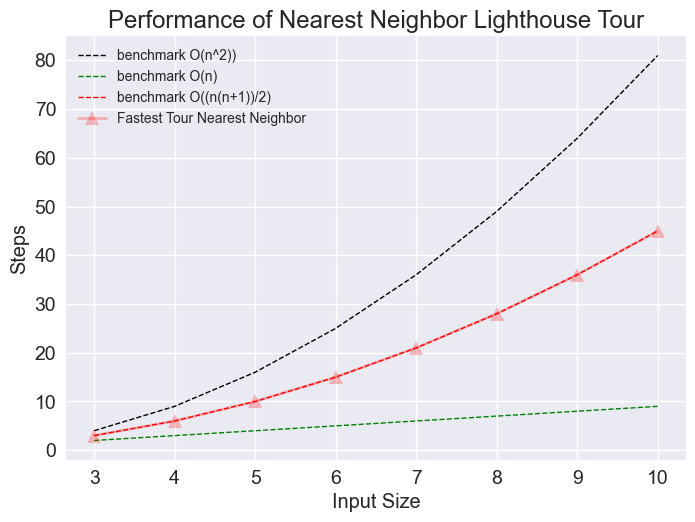

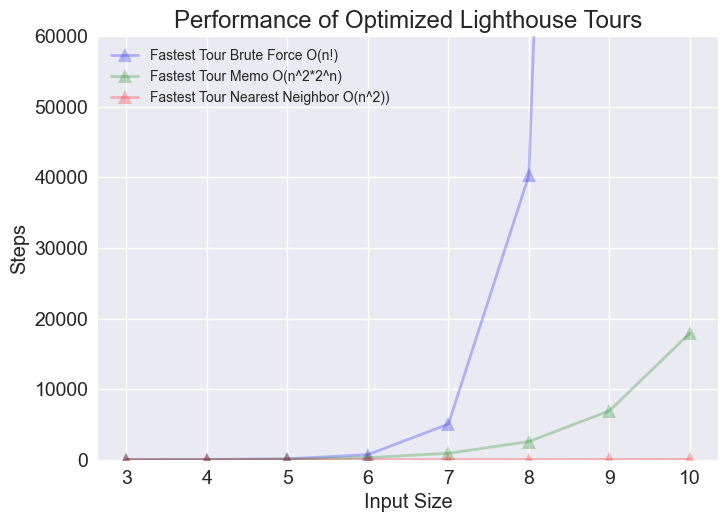

Mean 4.849619096482498 | Median 4.250946861499007 | Stddev 4.297990445286937 | Best Error: 0.0 | Worst Error 17.41875567163766


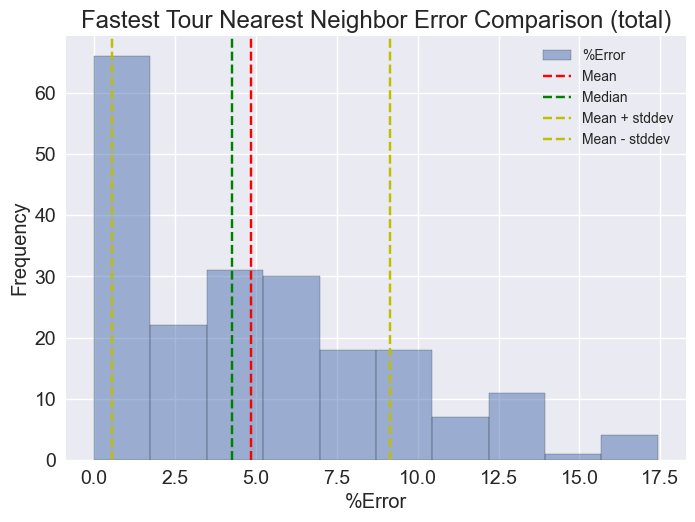

    X     |   MEAN   |  MEDIAN  |  STDDEV  |Best Error|  Worst Error  
---------------------------------------------------------------------------
   3.00   |   0.85   |   0.00   |   3.24   |   0.00   |  15.89   
   4.00   |   3.53   |   1.96   |   4.44   |   0.00   |  13.99   
   5.00   |   5.51   |   4.07   |   5.11   |   0.01   |  17.42   
   6.00   |   5.92   |   6.03   |   4.06   |   0.00   |  13.58   
   7.00   |   5.69   |   6.40   |   4.06   |   0.10   |  13.77   
   8.00   |   6.26   |   5.75   |   3.88   |   0.45   |  15.82   
   9.00   |   5.69   |   5.56   |   3.63   |   0.34   |  17.24   
  10.00   |   5.34   |   5.40   |   2.71   |   0.86   |  11.26   


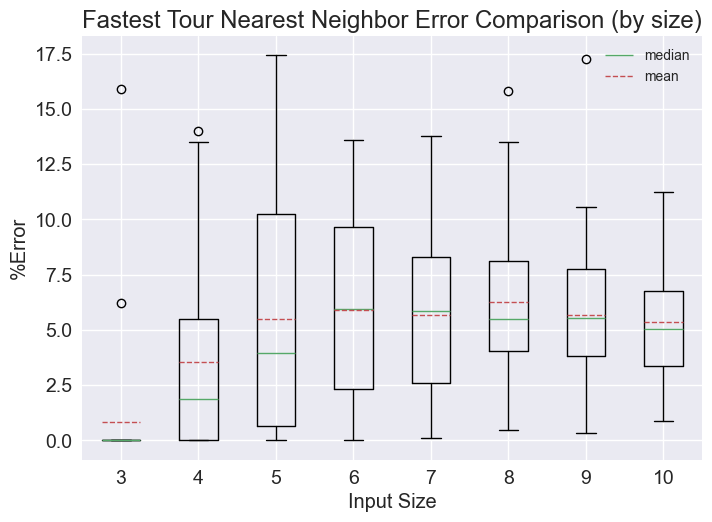

In [11]:
####################################################
# PUT YOUR PLOT CODE HERE
# 
####################################################
%matplotlib inline
import matplotlib.pyplot as plt
from math import factorial, sqrt
plt.style.use('seaborn-v0_8')

def plot_whisker(xvals, memo_times, nn_times):

    errors = []
    print("{:^10}|{:^10}|{:^10}|{:^10}|{:^10}|{:^15}".format("X", "MEAN", "MEDIAN", "STDDEV", "Best Error", "Worst Error"))
    print("-"*75)
    for i in memo_times: 
        m = memo_times[i]
        n = nn_times[i]
        i_errors = [((k-j)/j)*100 for j,k in zip (m, n)]
        mean = sum(i_errors) / len(i_errors)
        i_errors.sort()
        median = i_errors[len(i_errors)//2]
        best = i_errors[0]
        worst = i_errors[-1]
        var  = sum([(x-mean)**2 for x in i_errors]) / len(i_errors)
        stddev  = sqrt(var)
        print("{:^10.2f}|{:^10.2f}|{:^10.2f}|{:^10.2f}|{:^10.2f}|{:^10.2f}".format(i, mean, median, stddev, best, worst))
        errors.append(i_errors)

    plt.figure()
    plt.title("Fastest Tour Nearest Neighbor Error Comparison (by size)", size="xx-large")
    plt.ylabel("%Error", size="x-large")
    plt.xlabel("Input Size", size="x-large")
    bx = plt.boxplot(errors, positions=xvals, showmeans=True, meanline=True)
    plt.tick_params(axis="both", which="major", labelsize=14)
    plt.legend([bx['medians'][0], bx['means'][0]], ['median', 'mean'])
    plt.show()


def plot_error(xvals, memo_times, nn_times):
    errors = []
    for i in memo_times: 
        errors.extend([((n-m)/m)*100 for m, n in zip (memo_times[i], nn_times[i])])
    errors.sort()
    mean = sum(errors) / len(errors)
    median = errors[len(errors)//2]
    best = errors[0]
    worst = errors[-1]
    var  = sum([(x-mean)**2 for x in errors]) / len(errors)
    stddev  = sqrt(var)
    print(f"Mean {mean} | Median {median} | Stddev {stddev} | Best Error: {best} | Worst Error {worst}")

    plt.figure()
    plt.title("Fastest Tour Nearest Neighbor Error Comparison (total)", size="xx-large")
    plt.ylabel("Frequency", size="x-large")
    plt.xlabel("%Error", size="x-large")
    plt.hist(errors, label="%Error", alpha=0.50, edgecolor='black')
    plt.axvline(x=mean, color='r', linestyle='--', label='Mean')
    plt.axvline(x=median, color='g', linestyle='--', label='Median')
    plt.axvline(x=mean + stddev, color='y', linestyle='--', label='Mean + stddev')
    plt.axvline(x=mean - stddev, color='y', linestyle='--', label='Mean - stddev')
    plt.tick_params(axis="both", which="major", labelsize=14)
    plt.legend()
    plt.show()


def plot_steps(xvals, nn_steps):
    plt.figure()
    plt.title("Performance of Nearest Neighbor Lighthouse Tour", size="xx-large")
    plt.ylabel("Steps", size="x-large")
    plt.xlabel("Input Size", size="x-large")
    nn_steps_to_plot = [v[0] for k,v in nn_steps.items()]

    yTestVals1 = []
    yTestVals2 = []
    yTestVals3 = []
    for i in xvals:
        i = i -1
        yTestVals1.append(i**2)
        yTestVals2.append(i)
        yTestVals3.append( (i*(i+1))/2 )


    plt.plot(xvals, yTestVals1, "k^--", markersize=0,linewidth=1, label="benchmark O(n^2))") 
    plt.plot(xvals, yTestVals2, "g^--", markersize=0,linewidth=1, label="benchmark O(n)") 
    plt.plot(xvals, yTestVals3, "r^--", markersize=0,linewidth=1, label="benchmark O((n(n+1))/2)") 

    plt.plot(xvals, nn_steps_to_plot, "r^-", markersize=10, linewidth=2, label="Fastest Tour Nearest Neighbor",  alpha=0.25)
    plt.tick_params(axis="both", which="major", labelsize=14)
    plt.legend()
    plt.show()

def plot_steps_comparison(xvals, memo_steps, nn_steps, limit=True):
    plt.figure()
    plt.title("Performance of Optimized Lighthouse Tours", size="xx-large")
    plt.ylabel("Steps", size="x-large")
    plt.xlabel("Input Size", size="x-large")
    if limit: 
        plt.ylim([0, 60000]) # y-axis scale

    bf_steps = [factorial(i) for i in xvals]
    memo_steps_avrg = [sum(v)/len(v) for k,v in memo_steps.items()]
    nn_steps_to_plot = [v[0] for k,v in nn_steps.items()]

    # plot bf and memo steps
    plt.plot(xvals, bf_steps, "b^-", markersize=10, linewidth=2, label="Fastest Tour Brute Force O(n!)",  alpha=0.25)
    plt.plot(xvals, memo_steps_avrg, "g^-", markersize=10, linewidth=2, label="Fastest Tour Memo O(n^2*2^n)",  alpha=0.25)
    plt.plot(xvals, nn_steps_to_plot, "r^-", markersize=10, linewidth=2, label="Fastest Tour Nearest Neighbor O(n^2))",  alpha=0.25)
    plt.tick_params(axis="both", which="major", labelsize=14)
    plt.legend()
    plt.show()

# print(nn_steps)
plot_steps(xvals, nn_steps)
plot_steps_comparison(xvals, memo_steps, nn_steps)
plot_error(xvals, memo_times, nn_times)
plot_whisker(xvals, memo_times, nn_times)

# PART 3 RETROSPECTION

## Retrospection (10 pts)

Explain your results here.  Your graph should "tell a story"... write the story in plain English here.

If you had a problem with your code, or graph, write down here how you followed the 1-2-3 Rule given in the Getting Started module.  You should explain what you tried to do, what did/did not work, and what you would do next if you had additional time.  **Important:  don't just turn in broken code, or graphs that don't match your analytic results!**  It's important to show that, if there was some problem, you recognized that there was an issue and what you were doing to resolve the disconnect.  Bugs and mistakes do happen, time does run out, but you need to show what you understand of the problem in order to get at least partial credit.  


Figure 1 shows the bounds of the *fastest_tour_nn()* function. The asymptotic bounds analysis claimed that the runtime of the algorithm would be $Θ(\frac{n(n+1)}{2})$, which confirmed by the overlapping dotted (benchmark) and solid (function steps) red lines. The black dotted line represents the upper bounds of $O(n^2)$ and the dotted green line shows how these runtimes relate to a linear algorithm $O(n)$. Note that the plotting code accounts for *n* being one less than the total number of lighthouses since the initial *start_light* is removed from *L* before entering the while-loop. 

The second figure compares the runtimes of the three lighthouse tour functions from the programming assignments. The blue line shows the factorial runtime of the brute force algorithm, the green line shows the improvement made using memoization, bringing the runtime to $O(n^2*2^n)$, and the red line shows the $O(n^2)$ runtime of the nearest neighbor approach. This figure demonstrates the drastic difference in runtime achieved by the nearest neighbor approximation algorithm. This highlights the power of approximation algorithms to perform efficiently on large datasets. 

The third figure aims to quantify the error between the tour time computed by the nearest neighbor approximation algorithm and the exact algorithm. The *fastest_tour_memo()* function was used to compute the exact tour time. Each algorithm was run eight times on a randomly generated list of lighthouses ranging in size from 3 to 10. For each run a random lighthouse was chosen to be the *start_light* for *fastest_tour_nn()*. This experiment was then repeated 25 times to account for random variation in the input and obtain a more complete representation of the error. For each run the percent error was calculated by: $(\frac{a-e}{e})*100$, where *a* is the approximate tour time from *fastest_tour_nn()* and *e* was the excepted best tour time computed by *fastest_tour_memo()*. Percent error was used to account for the difference in size of *L* at each run. The histogram in figure 3 shows the frequency of percent error values over all the runs in the experiments, as well as the mean, median and +/- standard deviation from the mean. During my experiment the maximum error was 17.4% and the best error was 0.0%. The mean and median error were 4.8% and 4.2%, respectively, with a standard deviation of 4.3%. Most of the error was accumulated in the 0-10% range.

Figure 4 shows a box-and-whisker plot that stratifies the percent error by number of lighthouses in the input. This plot shows that as the input increases the mean and median percent error converges to ~5% error. The shrinking of the IQR range also shows the convergence of error into a smaller range as the input size increases. 

We can use the results of these experiments to help guide the decision to use an exact or approximate algorithm. The exact algorithm will always return the best tour but at the cost of increased runtime. In scenarios where the absolute best tour is required, an exact algorithm would be necessary. Although, even at moderate sized inputs (n >15), the exact algorithms (brute force or memo) become inefficient. This can be quantified by the super-polynomial (brute force) and exponential (memo) runtime of the exact algorithms, as shown in figure 1. We can overcome this inefficacy by leveraging approximation to produce a polynomial runtime algorithm. This comes at the cost of introducing error into the calculation of the fastest tour. As the experiments show, for the nearest neighbor approximation the mean and median percent error converge to ~5% and in the worst-case reach ~17%. This is much better than the theoretical worst-case error described above. A hybrid approach, which uses an exact algorithm for small inputs and an approximation algorithm for large inputs, can be used to minimize risk. The decision to use an exact or approximate algorithm will depend on the requirements of the situation, but this experiment quantifies the trade-offs between the two options. 

Several code improvements were made, such as type hints, docstrings, error handling, and wrapper functions. A naive (linear) nearest neighbor search was implemented for simplicity. Testing was performed to ensure all the lighthouses were toured by the algorithm and the tour time was greater than zero. 


## Citations
[1] Cormen, Thomas H., et al. Introduction to Algorithms, Fourth Edition, MIT Press, 2022. ProQuest Ebook Central, https://ebookcentral-proquest-com.proxy1.library.jhu.edu/lib/jhu/detail.action?docID=6925615.

[2] Course material 

[3] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

[4] https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_alpha.html

[5] https://en.wikipedia.org/wiki/Box_plot

In [9]:
def run_tests(travel_times, answer_tour, answer_time):
    L = list(set([item for k in travel_times.keys() for item in k]))
    print("\n------------------------------------\n")
    print(f"Running test on input: {L}")
    best_tour, best_time, steps = fastest_tour_wrapper_nn(
        L, travel_times)
    print(
        f"Result:\n\t{best_tour=}\n\t{best_time=}\n\t{steps=}\n")
    assert sorted(best_tour) == sorted(answer_tour), f"expected all lighthouses in {best_tour}"
    assert best_time > 0, f"Expected {best_time} > 0"
    print("TEST PASSED")
    print("\n------------------------------------\n")

In [10]:
# Test #1
TRAVEL_TIME = {
    ("D", "E"): 9.8874546134365,
    ("D", "B"): 8.650955785569098,
    ("D", "C"): 4.527990409960845,
    ("D", "A"): 9.817667809230786,
    ("E", "B"): 10.931854306263975,
    ("E", "C"): 7.255251488484818,
    ("E", "A"): 12.917982527478712,
    ("B", "C"): 4.113565483054365,
    ("B", "A"): 9.560863383439097,
    ("C", "A"): 7.854345573910511,
}
# Expected output
# The best tour is:  A, B, C, D, E
# The best time is:  28.089873889890804
answer = ["A", "B", "C", "D", "E"]
time = 28.089873889890804
run_tests(TRAVEL_TIME, answer, time)


# Test #2
TRAVEL_TIME = {
    ("B", "C"): 6.429795406216918,
    ("B", "A"): 11.629846115160516,
    ("B", "D"): 7.679251919404714,
    ("B", "E"): 9.347706263090837,
    ("C", "A"): 12.280646160363432,
    ("C", "D"): 7.746192483295421,
    ("C", "E"): 9.90681627370574,
    ("A", "D"): 12.227183481562683,
    ("A", "E"): 16.655823285647106,
    ("D", "E"): 8.25715774835559,
}
# Expected output
# The best tour is:  A, B, C, D, E
# The best time is:  34.06299175302845
answer = ["A", "B", "C", "D", "E"]
time = 34.06299175302845
run_tests(TRAVEL_TIME, answer, time)


# Test #3
TRAVEL_TIME = {
    ("F", "E"): 7.453320453415392,
    ("F", "D"): 6.170569410345761,
    ("F", "I"): 10.448429302986911,
    ("F", "G"): 6.187750187309644,
    ("F", "C"): 12.090422838563583,
    ("F", "H"): 11.539119418380032,
    ("F", "A"): 13.23865323724485,
    ("F", "J"): 14.209616157057711,
    ("F", "B"): 12.029520235766265,
    ("E", "D"): 4.594971038617467,
    ("E", "I"): 9.488857351897519,
    ("E", "G"): 4.661282508675182,
    ("E", "C"): 10.705763401441896,
    ("E", "H"): 10.12354365573923,
    ("E", "A"): 12.05863087182219,
    ("E", "J"): 12.857918364285274,
    ("E", "B"): 10.915808926216425,
    ("D", "I"): 8.773798408565863,
    ("D", "G"): 3.549820998388679,
    ("D", "C"): 9.084763991756446,
    ("D", "H"): 8.47244200438249,
    ("D", "A"): 10.768085646027655,
    ("D", "J"): 11.205467989446557,
    ("D", "B"): 9.811703475051996,
    ("I", "G"): 4.856711290250502,
    ("I", "C"): 10.303247633652786,
    ("I", "H"): 9.72873923304563,
    ("I", "A"): 11.752971702744057,
    ("I", "J"): 12.386140947772116,
    ("I", "B"): 10.715926552978804,
    ("G", "C"): 8.939922836985131,
    ("G", "H"): 8.325372714362043,
    ("G", "A"): 10.658709470483634,
    ("G", "J"): 11.05300320168352,
    ("G", "B"): 9.726036954632448,
    ("C", "H"): 14.85107596522508,
    ("C", "A"): 16.127909792272288,
    ("C", "J"): 17.54748278310382,
    ("C", "B"): 14.699070399680458,
    ("H", "A"): 15.723529687188293,
    ("H", "J"): 17.10791004081554,
    ("H", "B"): 14.306778662449995,
    ("A", "J"): 16.949188359233272,
    ("A", "B"): 14.239542023142393,
    ("J", "B"): 16.6207970728817,
}
# Expected output
# The best tour is:  A, B, C, D, E, F, G, H, I, J
# The best time is:  86.69967098910159

answer = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
time = 86.69967098910159
run_tests(TRAVEL_TIME, answer, time)


# Test 4 - test against the actual lighthouses used in the challenge, so
# you can see the original motivation for this assignment.  Times are from
# maps.google.com and reflect best possible driving times between two
# lighthouses subject to current traffic conditions.

# If you want to visualize this tour, it's here:
# https://goo.gl/maps/h9NbbQT5kS3S6kZ98

# Note that in the real world, travel times are highly dependent on time of
# day and are often not symmetrical-- that's part of why the TSP problem is
# so interesting!

TRAVEL_TIME = {
    ("Concord Point", "Seven Foot Knoll"): 0.88,
    ("Concord Point", "Lightship Chesapeake"): 0.87,
    ("Concord Point", "Hooper Strait"): 1.92,
    ("Concord Point", "Choptank River"): 2.02,
    ("Concord Point", "Drum Point"): 2.12,
    ("Concord Point", "Cove Point"): 2.15,
    ("Concord Point", "Piney Point"): 2.60,
    ("Concord Point", "Point Lookout"): 2.73,
    ("Concord Point", "Fort Washington"): 1.73,
    ("Concord Point", "Sandy Point"): 1.28,
    ("Seven Foot Knoll", "Lightship Chesapeake"): 0.07,
    ("Seven Foot Knoll", "Hooper Strait"): 1.52,
    ("Seven Foot Knoll", "Choptank River"): 1.62,
    ("Seven Foot Knoll", "Drum Point"): 1.58,
    ("Seven Foot Knoll", "Cove Point"): 1.62,
    ("Seven Foot Knoll", "Piney Point"): 2.05,
    ("Seven Foot Knoll", "Point Lookout"): 2.22,
    ("Seven Foot Knoll", "Fort Washington"): 1.17,
    ("Seven Foot Knoll", "Sandy Point"): 0.78,
    ("Lightship Chesapeake", "Hooper Strait"): 1.47,
    ("Lightship Chesapeake", "Choptank River"): 1.57,
    ("Lightship Chesapeake", "Drum Point"): 1.53,
    ("Lightship Chesapeake", "Cove Point"): 1.57,
    ("Lightship Chesapeake", "Piney Point"): 1.98,
    ("Lightship Chesapeake", "Point Lookout"): 2.17,
    ("Lightship Chesapeake", "Fort Washington"): 1.12,
    ("Lightship Chesapeake", "Sandy Point"): 0.73,
    ("Hooper Strait", "Choptank River"): 0.60,
    ("Hooper Strait", "Drum Point"): 2.03,
    ("Hooper Strait", "Cove Point"): 2.08,
    ("Hooper Strait", "Piney Point"): 2.50,
    ("Hooper Strait", "Point Lookout"): 2.67,
    ("Hooper Strait", "Fort Washington"): 1.77,
    ("Hooper Strait", "Sandy Point"): 0.93,
    ("Choptank River", "Drum Point"): 2.13,
    ("Choptank River", "Cove Point"): 2.17,
    ("Choptank River", "Piney Point"): 2.60,
    ("Choptank River", "Point Lookout"): 2.77,
    ("Choptank River", "Fort Washington"): 1.85,
    ("Choptank River", "Sandy Point"): 1.03,
    ("Drum Point", "Cove Point"): 0.23,
    ("Drum Point", "Piney Point"): 0.48,
    ("Drum Point", "Point Lookout"): 0.63,
    ("Drum Point", "Fort Washington"): 1.18,
    ("Drum Point", "Sandy Point"): 1.32,
    ("Cove Point", "Piney Point"): 0.70,
    ("Cove Point", "Point Lookout"): 0.83,
    ("Cove Point", "Fort Washington"): 1.28,
    ("Cove Point", "Sandy Point"): 1.35,
    ("Piney Point", "Point Lookout"): 0.72,
    ("Piney Point", "Fort Washington"): 1.42,
    ("Piney Point", "Sandy Point"): 1.78,
    ("Point Lookout", "Fort Washington"): 1.67,
    ("Point Lookout", "Sandy Point"): 1.97,
    ("Fort Washington", "Sandy Point"): 1.05,
}

# Expected output
# The best tour is:  Choptank River, Hooper Strait, Sandy Point, Concord Point, Seven Foot Knoll, Lightship Chesapeake,
#       Fort Washington, Cove Point, Drum Point, Piney Point, Point Lookout
# The best time is:  7.59
answer = [
    "Choptank River",
    "Hooper Strait",
    "Sandy Point",
    "Concord Point",
    "Seven Foot Knoll",
    "Lightship Chesapeake",
    "Fort Washington",
    "Cove Point",
    "Drum Point",
    "Piney Point",
    "Point Lookout",
]
time = 7.59
run_tests(TRAVEL_TIME, answer, time)


------------------------------------

Running test on input: ['C', 'B', 'A', 'D', 'E']
Result:
	best_tour=['A', 'C', 'B', 'D', 'E']
	best_time=30.506321455970475
	steps=10

TEST PASSED

------------------------------------


------------------------------------

Running test on input: ['C', 'A', 'B', 'D', 'E']
Result:
	best_tour=['D', 'B', 'C', 'E', 'A']
	best_time=40.67168688497448
	steps=10

TEST PASSED

------------------------------------


------------------------------------

Running test on input: ['I', 'F', 'C', 'A', 'B', 'H', 'D', 'J', 'G', 'E']
Result:
	best_tour=['C', 'G', 'D', 'E', 'F', 'I', 'H', 'B', 'A', 'J']
	best_time=90.21071290826487
	steps=45

TEST PASSED

------------------------------------


------------------------------------

Running test on input: ['Drum Point', 'Point Lookout', 'Fort Washington', 'Choptank River', 'Concord Point', 'Seven Foot Knoll', 'Sandy Point', 'Cove Point', 'Piney Point', 'Lightship Chesapeake', 'Hooper Strait']
Result:
	best_tour=['Dru